In [1]:
from datetime import datetime, timedelta
import h5py
import numpy as np
import warnings
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [120]:
dt=30 # 30
region = 'TASMAN' # NEP SWP TASMAN
path2save = '/Users/jacoposala/Desktop/test_line_plots/'
file_path_ecco = f'/Users/jacoposala/Downloads/MHWs_data_ouput_Aug16/ECCO_daily_avg_box_{region}_OHC_1992_2017/ECCOv4r4_heat_daily_box_1992_2017_prcnt90_smooth_noTrend_minLen_5tsteps_maxGap_2tsteps_withAVE.mat'


In [121]:
# # Load ECCO output from Matlab MHWs code
file_path_ecco = f'/Users/jacoposala/Downloads/MHWs_data_ouput_Aug16/ECCO_daily_avg_box_{region}_OHC_1992_2017/ECCOv4r4_heat_daily_box_1992_2017_prcnt90_smooth_noTrend_minLen_5tsteps_maxGap_2tsteps_withAVE.mat'
# Load the data selected above
mat_data_ecco = h5py.File(file_path_ecco, 'r')

# List the keys in the file
# print("Keys in the file:", list(mat_data.keys()))

# Access the data under the key '#refs#'
refs_data_ecco = mat_data_ecco['#refs#']

# Access the data under the key 'find_MHWs_info'
find_mhws_info_data_ecco = mat_data_ecco['find_MHWs_info']

# find_mhws_info_data_ecco.keys()


In [122]:
find_mhws_info_data_ecco.keys()

<KeysViewHDF5 ['G_advection_declineAve', 'G_advection_eventAve', 'G_advection_onsetAve', 'G_diffusion_declineAve', 'G_diffusion_eventAve', 'G_diffusion_onsetAve', 'G_forcing_declineAve', 'G_forcing_eventAve', 'G_forcing_onsetAve', 'G_total_declineAve', 'G_total_eventAve', 'G_total_onsetAve', 'adv_vConv_declineAve', 'adv_vConv_eventAve', 'adv_vConv_onsetAve', 'data_backup', 'data_datenum', 'data_mhw_tstep_msk', 'data_percentile3d', 'data_percentile3d_not_smooth', 'data_seasonal', 'data_used4MHWs', 'data_used4MHWs_declineAve', 'data_used4MHWs_eventAve', 'data_used4MHWs_onsetAve', 'delta_tstep', 'dif_vConv_declineAve', 'dif_vConv_eventAve', 'dif_vConv_onsetAve', 'end_tstep', 'end_tstep_stored_at_peak', 'events_duration_in_tsteps', 'events_number', 'flag_remove_trend', 'onset_duration_in_tsteps', 'peak_tstep', 'peak_tstep_msk', 'peak_value', 'percentile', 'start_tstep', 'start_tstep_msk', 'tstep_part_of_event_msk', 'years']>

In [ ]:
matlab_datenum = find_mhws_info_data_ecco['data_datenum'].value[0]
python_datetime = [datetime.fromordinal(int(x)) + timedelta(days=x%1) - timedelta(days = 366) for x in matlab_datenum]



In [ ]:
start_tstep_msk = find_mhws_info_data_ecco['start_tstep_msk'].value
end_tstep = find_mhws_info_data_ecco['end_tstep'].value
peak_tstep = find_mhws_info_data_ecco['peak_tstep'].value

start_tstep_sel = np.nonzero(start_tstep_msk)[0]
end_tstep_sel = end_tstep[start_tstep_sel].T[0][0].astype(int)
peak_tstep_sel = peak_tstep[start_tstep_sel].T[0][0].astype(int)



In [ ]:
# start_date_event = '2013-12-01'
# peak_date_event = '2014-01-15'
# end_date_event = '2014-11-15'

for idx, istart in enumerate(start_tstep_sel):
    start_date_event = datetime.strftime(python_datetime[start_tstep_sel[idx]],'%Y-%m-%d')
    peak_date_event = datetime.strftime(python_datetime[peak_tstep_sel[idx]],'%Y-%m-%d')
    end_date_event = datetime.strftime(python_datetime[end_tstep_sel[idx]],'%Y-%m-%d')
    
    for iphase in ['preset', 'onset', 'decline']:
        if iphase == 'preset':
                start_date = datetime.strptime(start_date_event,'%Y-%m-%d') - timedelta(days=dt)
                start_date = datetime.strftime(start_date,'%Y-%m-%d')
                end_date = start_date_event
        elif iphase == 'onset':
                start_date = start_date_event
                end_date = peak_date_event
        elif iphase == 'decline':
                start_date = peak_date_event
                end_date = end_date_event
        tag2plot = start_date_event + '_' + iphase + '_' + start_date + '_' + end_date        


        cmd = 'python ECCOv4r4_create_line_plots_heat_budget_terms_from_OHC_newSep9.py ' + file_path_ecco + \
        ' ' + start_date + ' ' + end_date + \
        ' ' + region + ' ' + tag2plot + ' ' + path2save 

        !{cmd}
        
        
    

In [ ]:
# start_date_event = '2013-11-23'
# peak_date_event = '2014-01-15'
# end_date_event = '2014-11-15'

# tag2plot = start_date_event + '_preset_' + '2013-11-16' + '_' + start_date_event

# cmd = 'python ECCOv4r4_create_line_plots_heat_budget_terms_from_OHC_newSep9.py ' + file_path_ecco + \
#         ' ' + '2013-11-16' + ' ' + start_date_event + \
#         ' ' + region + ' ' + tag2plot + ' ' + path2save 

# !{cmd}

### Plot to visualize the contribution of each term

In [123]:
find_mhws_info_data_ecco.keys()

<KeysViewHDF5 ['G_advection_declineAve', 'G_advection_eventAve', 'G_advection_onsetAve', 'G_diffusion_declineAve', 'G_diffusion_eventAve', 'G_diffusion_onsetAve', 'G_forcing_declineAve', 'G_forcing_eventAve', 'G_forcing_onsetAve', 'G_total_declineAve', 'G_total_eventAve', 'G_total_onsetAve', 'adv_vConv_declineAve', 'adv_vConv_eventAve', 'adv_vConv_onsetAve', 'data_backup', 'data_datenum', 'data_mhw_tstep_msk', 'data_percentile3d', 'data_percentile3d_not_smooth', 'data_seasonal', 'data_used4MHWs', 'data_used4MHWs_declineAve', 'data_used4MHWs_eventAve', 'data_used4MHWs_onsetAve', 'delta_tstep', 'dif_vConv_declineAve', 'dif_vConv_eventAve', 'dif_vConv_onsetAve', 'end_tstep', 'end_tstep_stored_at_peak', 'events_duration_in_tsteps', 'events_number', 'flag_remove_trend', 'onset_duration_in_tsteps', 'peak_tstep', 'peak_tstep_msk', 'peak_value', 'percentile', 'start_tstep', 'start_tstep_msk', 'tstep_part_of_event_msk', 'years']>

In [124]:
factor = .9

In [125]:
G_advection_onsetAve = find_mhws_info_data_ecco['G_advection_onsetAve'].value
G_diffusion_onsetAve = find_mhws_info_data_ecco['G_diffusion_onsetAve'].value
G_forcing_onsetAve = find_mhws_info_data_ecco['G_forcing_onsetAve'].value

G_advection_declineAve = find_mhws_info_data_ecco['G_advection_declineAve'].value
G_diffusion_declineAve = find_mhws_info_data_ecco['G_diffusion_declineAve'].value
G_forcing_declineAve = find_mhws_info_data_ecco['G_forcing_declineAve'].value


In [126]:
start_tstep_msk = find_mhws_info_data_ecco['start_tstep_msk'].value
peak_tstep_msk = find_mhws_info_data_ecco['peak_tstep_msk'].value
peak_tstep = find_mhws_info_data_ecco['peak_tstep'].value
peak_tstep_msk = find_mhws_info_data_ecco['peak_tstep_msk'].value
# for decline phase
peak_tstep_msk_shifted = peak_tstep_msk
peak_tstep_msk_shifted[1:,0,0] = peak_tstep_msk[0:-1,0,0]
peak_tstep_msk_shifted[0] = 0

In [127]:
G_advection_onsetAve_events = G_advection_onsetAve[start_tstep_msk==1]
G_diffusion_onsetAve_events = G_diffusion_onsetAve[start_tstep_msk==1]
G_forcing_onsetAve_events = G_forcing_onsetAve[start_tstep_msk==1]

G_advection_declineAve_events = G_advection_declineAve[peak_tstep_msk_shifted==1]
G_diffusion_declineAve_events = G_diffusion_declineAve[peak_tstep_msk_shifted==1]
G_forcing_declineAve_events = G_forcing_declineAve[peak_tstep_msk_shifted==1]

In [170]:
def summary_onset(array1, array2, array3, label1, label2, label3, factor):
    print('--------------------')
    
    print(label1 + ' and ' + label2 + ' positive, sorted: ' + label1 + ', ' + label2 + ', ' + label3 + ': ' +\
    str(np.sum(np.logical_and(np.logical_and(array1>0, array1>array2), np.logical_and(array2>0, array2>array3)))/len(array1)*100) + '%')
    
    print(label2 + '/' + label1 + '>' + str(factor) + ': ' + \
          str(np.sum(np.logical_and(np.logical_and(np.logical_and(array1>0, array1>array2), \
                                                   np.logical_and(array2>0, array2>array3)), \
                                                   array2/array1>factor))/len(array1)*100) + '%')
        
    print(label1 + ' and ' + label3 + ' positive, sorted: ' + label1 + ', ' + label3 + ', ' + label2 + ': ' +\
    str(np.sum(np.logical_and(np.logical_and(array1>0, array1>array3), np.logical_and(array3>0, array3>array2)))/len(array1)*100) + '%')

    print(label3 + '/' + label1 + '>' + str(factor) + ': ' + \
        str(np.sum(np.logical_and(np.logical_and(np.logical_and(array1>0, array1>array3), \
                                                 np.logical_and(array3>0, array3>array2)), \
                                                 array3/array1>factor))/len(array1)*100) + '%')
        
    print(label1 + ' is negative: ' + str(np.sum(array1<0)/len(array1)*100) + '%')
    
    
        
def summary_decline(array1, array2, array3, label1, label2, label3, factor):
    print('--------------------')
    
    print(label1 + ' and ' + label2 + ' negative, sorted: ' + label1 + ', ' + label2 + ', ' + label3 + ': ' +\
    str(np.sum(np.logical_and(np.logical_and(array1<0, array1<array2), np.logical_and(array2<0, array2<array3)))/len(array1)*100) + '%')
    
    print(label2 + '/' + label1 + '>' + str(factor) + ': ' + \
          str(np.sum(np.logical_and(np.logical_and(np.logical_and(array1<0, array1<array2), \
                                                   np.logical_and(array2<0, array2<array3)), \
                                                   array2/array1>factor))/len(array1)*100) + '%')
        
    print(label1 + ' and ' + label3 + ' negative, sorted: ' + label1 + ', ' + label3 + ', ' + label2 + ': ' +\
    str(np.sum(np.logical_and(np.logical_and(array1<0, array1<array3), np.logical_and(array3<0, array3<array2)))/len(array1)*100) + '%')

    print(label3 + '/' + label1 + '>' + str(factor) + ': ' + \
        str(np.sum(np.logical_and(np.logical_and(np.logical_and(array1<0, array1<array3), \
                                                 np.logical_and(array3<0, array3<array2)), \
                                                 array3/array1>factor))/len(array1)*100) + '%')
    
    
    
    print(label1 + ' is positive: ' + str(np.sum(array1>0)/len(array1)*100) + '%')
    
        
        
        
        

In [171]:
def stacked_bar_plot(array1, array2, array3, label1, label2, label3, title, region, factor):
    plt.figure(figsize=(15, 6))

    # Set the width of the bars
    width = 0.2  # the width of the bars

    # The x locations for the groups
    x = np.arange(len(array1))

    # Plotting the bars
    plt.bar(x - width, array1, width, label=label1, color='magenta')
    plt.bar(x, array2, width, label=label2, color='blue')
    plt.bar(x + width, array3, width, label=label3, color='green')

    # Adding labels, title, and legend
    plt.ylabel('Values')
    plt.title(title + ', ' + region)
    plt.xticks(x, range(len(array1)))  # Adjust as needed for your x-axis labels
    plt.legend()

    # Show the plot
    plt.show()

    print('++++++++++++++')
    print('Number of events: ' + str(len(array1)))

    # Call summary functions based on title
    if title == 'onset':
        summary_onset(array1, array2, array3, label1, label2, label3, factor)
        summary_onset(array2, array1, array3, label2, label1, label3, factor)
        summary_onset(array3, array2, array1, label3, label2, label1, factor)

    if title == 'decline':
        summary_decline(array1, array2, array3, label1, label2, label3, factor)
        summary_decline(array2, array1, array3, label2, label1, label3, factor)
        summary_decline(array3, array2, array1, label3, label2, label1, factor)
        

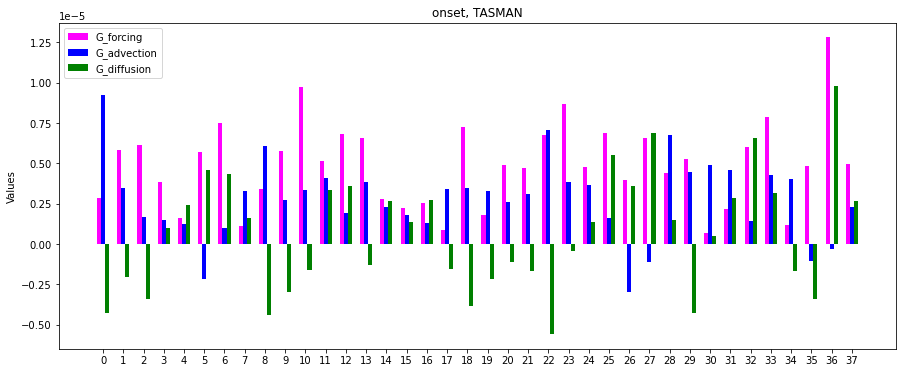

++++++++++++++
Number of events: 38
--------------------
G_forcing and G_advection positive, sorted: G_forcing, G_advection, G_diffusion: 39.473684210526315%
G_advection/G_forcing>0.9: 0.0%
G_forcing and G_diffusion positive, sorted: G_forcing, G_diffusion, G_advection: 21.052631578947366%
G_diffusion/G_forcing>0.9: 5.263157894736842%
G_forcing is negative: 0.0%
--------------------
G_advection and G_forcing positive, sorted: G_advection, G_forcing, G_diffusion: 21.052631578947366%
G_forcing/G_advection>0.9: 2.631578947368421%
G_advection and G_diffusion positive, sorted: G_advection, G_diffusion, G_forcing: 5.263157894736842%
G_diffusion/G_advection>0.9: 0.0%
G_advection is negative: 13.157894736842104%
--------------------
G_diffusion and G_advection positive, sorted: G_diffusion, G_advection, G_forcing: 0.0%
G_advection/G_diffusion>0.9: 0.0%
G_diffusion and G_forcing positive, sorted: G_diffusion, G_forcing, G_advection: 10.526315789473683%
G_forcing/G_diffusion>0.9: 7.8947368421052

In [172]:
stacked_bar_plot(G_forcing_onsetAve_events, G_advection_onsetAve_events, G_diffusion_onsetAve_events, \
                 'G_forcing', 'G_advection', 'G_diffusion', 'onset', region, factor)




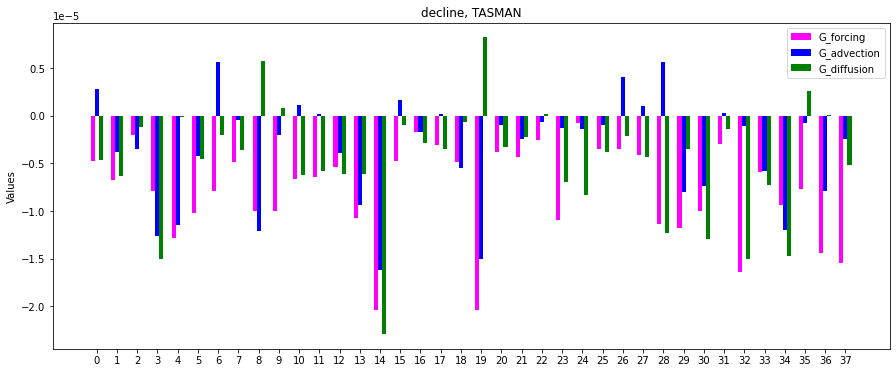

++++++++++++++
Number of events: 38
--------------------
G_forcing and G_advection negative, sorted: G_forcing, G_advection, G_diffusion: 23.684210526315788%
G_advection/G_forcing>0.9: 0.0%
G_forcing and G_diffusion negative, sorted: G_forcing, G_diffusion, G_advection: 36.84210526315789%
G_diffusion/G_forcing>0.9: 10.526315789473683%
G_forcing is positive: 0.0%
--------------------
G_advection and G_forcing negative, sorted: G_advection, G_forcing, G_diffusion: 7.894736842105263%
G_forcing/G_advection>0.9: 0.0%
G_advection and G_diffusion negative, sorted: G_advection, G_diffusion, G_forcing: 0.0%
G_diffusion/G_advection>0.9: 0.0%
G_advection is positive: 26.31578947368421%
--------------------
G_diffusion and G_advection negative, sorted: G_diffusion, G_advection, G_forcing: 10.526315789473683%
G_advection/G_diffusion>0.9: 0.0%
G_diffusion and G_forcing negative, sorted: G_diffusion, G_forcing, G_advection: 21.052631578947366%
G_forcing/G_diffusion>0.9: 7.894736842105263%
G_diffusion

In [173]:
stacked_bar_plot(G_forcing_declineAve_events, G_advection_declineAve_events, G_diffusion_declineAve_events, \
                 'G_forcing', 'G_advection', 'G_diffusion', 'decline', region, factor)